#### Capstone Project: 

Student name: Milena Afeworki   
Student pace: full time   
Scheduled project review date/time: 07/09/2021 @ 10:15 PT   
Instructor name: Abhineet Kulkarni   
Blog post URL:

# Bridges Condition Classificaiton Model



January 2019 marked the release of the Long-Term Bridge Performance (LTBP) Program’s InfoBridge™ web portal, a newly developed website for dissemination and visualization of bridge data, information, and products developed by the LTBP Program. The portal’s main purpose is to leverage the analytical capability of the highway bridge research community, and fulfill the Federal Highway Administration’s (FHWA’s) responsibility to provide transparency and ready access to data collected through Federal research programs.

## The Business Problem

Bridge management practices of departments of transportation is looking to assist bridge managers in making consistent and cost-effective decisions related to maintenance and rehabilitation of bridges. The decision making, either at the network level or at the project level, is based on current and future bridge conditions. Therefore, it is essential for a bridge management system to be capable of accurately predicting future bridge conditions to help make an informed decision on when and where to allocate maintenance budgets. 

## Data Understanding

The data pattern underlying the historical bridge inspection records contains useful information in
describing the deterioration trends of highway bridge decks, sub-structure and super-structure. Therefore, developing an appropriate
algorithm that can identify data patterns buried in history can solve the condition-forecast problem. The data-mining algorithm emphasizes the changing trends of bridge condition ratings along withother factors that may influence the structure-deterioration process.

The analysis uses NBI and climatic data from InfoBridge. The climatic data refer to the annual
numbers (unit in days) of freeze-thaw cycles and snowfalls. The National Aeronautics and Space
Administration (NASA) Modern-Era Retrospective Analysis for Research and Applications,
Version 2 (MERRA-2) program provides the original source of climate data  which is currently available from January 1, 1980 to December 31, 2020.


```
NBI scale	Condition	    Description

        9	Excellent	    New condition, no noteworthy deficiencies.
        8	Very good	    No repair needed.
        7	Good	         Some minor problems, minor maintenance needed.
        6	Satisfactory	 Some minor deterioration, major maintenance needed.
        5	Fair	         Minor section loss, cracking, spalling, or scouring.
        4	Poor	         Advanced section loss, deterioration, spalling or scouring; major rehabilitation needed. 
        3	Serious	      Section loss, deterioration, spalling or scouring seriously affected primary components.
        2	Critical	     Advanced deterioration of primary structural elements; bridge closed. 
        1	Imminent         Major deterioration or loss of section; bridge may be closed to traffic.
            failure
        0	Failed	       Out of service and beyond corrective action.

 ```


The government classifies a bridge as “structurally deficient” if any one of the following bridge components are rated less than or equal to 4 (in poor or worse condition):

- Deck condition
- Superstructure condition
- Substructure condition

## Obtain data

In [80]:
#Importing all the necessary library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.metrics import plot_confusion_matrix
from xgboost import XGBClassifier
sns.set_style()

In [81]:
# pd.options.display.max_columns = None

In [82]:
columns = ['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       'CAT10 - Bridge Condition', 'Bridge Age (yr)',
       '26 - Functional Class Of Inventory Route',
       '28A - Lanes On the Structure', '28B - Lanes Under the Structure',
       '5C - Designated Level of Service Code',
       '30 - Year of Average Daily Traffic', '104 - Inventory Route NHS Code',
       '110 - Designated National Truck Network Code',
       '54B - Minimum Vertical Underclearance (ft)',
       '55B - Minimum Lateral Underclearance on Right (ft)',
       '56 - Minimum Lateral Underclearance on Left (ft)']

In [83]:
# load first dataset.
ddf = pd.read_csv('C:/Users/milen/Flatiron-April05/Documents/BridgesExport_August_25_2021_03_04_42.csv',
#                 names = columns, usecols=range(0,15),
                  error_bad_lines=False, sep = ',', header = 0)
ddf.head()

b'Skipping line 126: expected 15 fields, saw 17\nSkipping line 383: expected 15 fields, saw 17\nSkipping line 809: expected 15 fields, saw 17\nSkipping line 2082: expected 15 fields, saw 17\nSkipping line 2386: expected 15 fields, saw 17\nSkipping line 2393: expected 15 fields, saw 17\nSkipping line 2410: expected 15 fields, saw 17\nSkipping line 4092: expected 15 fields, saw 17\nSkipping line 4395: expected 15 fields, saw 17\nSkipping line 5794: expected 15 fields, saw 17\nSkipping line 6488: expected 15 fields, saw 17\nSkipping line 6785: expected 15 fields, saw 17\nSkipping line 7332: expected 15 fields, saw 17\nSkipping line 8118: expected 15 fields, saw 17\nSkipping line 8257: expected 15 fields, saw 17\nSkipping line 8265: expected 15 fields, saw 17\nSkipping line 8268: expected 15 fields, saw 17\nSkipping line 8505: expected 15 fields, saw 17\nSkipping line 9962: expected 15 fields, saw 17\nSkipping line 12500: expected 15 fields, saw 17\nSkipping line 12504: expected 15 fields,

b'Skipping line 198112: expected 15 fields, saw 17\nSkipping line 198612: expected 15 fields, saw 17\nSkipping line 199008: expected 15 fields, saw 17\nSkipping line 199070: expected 15 fields, saw 17\nSkipping line 199192: expected 15 fields, saw 17\nSkipping line 199557: expected 15 fields, saw 17\nSkipping line 199660: expected 15 fields, saw 17\nSkipping line 199890: expected 15 fields, saw 17\nSkipping line 199893: expected 15 fields, saw 17\nSkipping line 199927: expected 15 fields, saw 17\nSkipping line 199984: expected 15 fields, saw 17\nSkipping line 200057: expected 15 fields, saw 17\nSkipping line 200058: expected 15 fields, saw 17\nSkipping line 200109: expected 15 fields, saw 17\nSkipping line 200132: expected 15 fields, saw 17\nSkipping line 200325: expected 15 fields, saw 17\nSkipping line 200538: expected 15 fields, saw 17\nSkipping line 200713: expected 15 fields, saw 17\nSkipping line 201263: expected 15 fields, saw 17\nSkipping line 201385: expected 15 fields, saw 17

b'Skipping line 328902: expected 15 fields, saw 17\nSkipping line 328904: expected 15 fields, saw 17\nSkipping line 329080: expected 15 fields, saw 17\nSkipping line 329730: expected 15 fields, saw 17\nSkipping line 330497: expected 15 fields, saw 17\nSkipping line 330833: expected 15 fields, saw 17\nSkipping line 331570: expected 15 fields, saw 17\nSkipping line 331787: expected 15 fields, saw 17\nSkipping line 331977: expected 15 fields, saw 17\nSkipping line 332086: expected 15 fields, saw 17\nSkipping line 332190: expected 15 fields, saw 17\nSkipping line 332255: expected 15 fields, saw 17\nSkipping line 332334: expected 15 fields, saw 17\nSkipping line 332708: expected 15 fields, saw 17\nSkipping line 332728: expected 15 fields, saw 17\nSkipping line 332783: expected 15 fields, saw 17\nSkipping line 332802: expected 15 fields, saw 17\nSkipping line 332846: expected 15 fields, saw 17\nSkipping line 332884: expected 15 fields, saw 17\nSkipping line 332894: expected 15 fields, saw 17

b'Skipping line 544503: expected 15 fields, saw 17\nSkipping line 544845: expected 15 fields, saw 17\nSkipping line 544846: expected 15 fields, saw 17\nSkipping line 545241: expected 15 fields, saw 17\nSkipping line 545368: expected 15 fields, saw 17\nSkipping line 545664: expected 15 fields, saw 17\nSkipping line 545708: expected 15 fields, saw 17\nSkipping line 545849: expected 15 fields, saw 17\nSkipping line 545868: expected 15 fields, saw 17\nSkipping line 546121: expected 15 fields, saw 17\nSkipping line 546436: expected 15 fields, saw 17\nSkipping line 547330: expected 15 fields, saw 17\nSkipping line 548234: expected 15 fields, saw 17\nSkipping line 549221: expected 15 fields, saw 17\nSkipping line 549520: expected 15 fields, saw 17\nSkipping line 549628: expected 15 fields, saw 17\nSkipping line 550112: expected 15 fields, saw 17\nSkipping line 551692: expected 15 fields, saw 17\nSkipping line 553707: expected 15 fields, saw 17\nSkipping line 553753: expected 15 fields, saw 17

,1 - State Name,8 - Structure Number,22 - Owner Agency,CAT10 - Bridge Condition,Bridge Age (yr),26 - Functional Class Of Inventory Route,28A - Lanes On the Structure,28B - Lanes Under the Structure,5C - Designated Level of Service Code,30 - Year of Average Daily Traffic,104 - Inventory Route NHS Code,110 - Designated National Truck Network Code,54B - Minimum Vertical Underclearance (ft),55B - Minimum Lateral Underclearance on Right (ft),56 - Minimum Lateral Underclearance on Left (ft)
0,'1 - Alabama',080103000001007,'U.S. Forest Service','Good',45,'9',1,0,'0',0.0,'0','0',0.0,0.0,0.0
1,'1 - Alabama',080106000001009,'U.S. Forest Service','Fair',40,'9',1,0,'0',0.0,'0','0',0.0,0.0,0.0
2,'1 - Alabama',020222,'State Highway Agency','Good',7,'7',2,0,'1',2013.0,'0','0',0.0,0.0,0.0
3,'1 - Alabama',021152,'State Highway Agency','Good',4,'11',1,2,'7',2017.0,'0','0',14.4,9.2,7.8
4,'1 - Alabama',021480,'State Highway Agency','Good',15,'2',2,0,'1',2012.0,'1','1',0.0,0.0,0.0


In [84]:
ddf.shape

(617127, 15)

In [85]:
ddf.columns

Index(['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       'CAT10 - Bridge Condition', 'Bridge Age (yr)',
       '26 - Functional Class Of Inventory Route',
       '28A - Lanes On the Structure', '28B - Lanes Under the Structure',
       '5C - Designated Level of Service Code',
       '30 - Year of Average Daily Traffic', '104 - Inventory Route NHS Code',
       '110 - Designated National Truck Network Code',
       '54B - Minimum Vertical Underclearance (ft)',
       '55B - Minimum Lateral Underclearance on Right (ft)',
       '56 - Minimum Lateral Underclearance on Left (ft)'],
      dtype='object')

In [86]:
columns = ['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       '107 - Deck Structure Type Code', '108A - Wearing Surface Type Code',
       '108B - Membrane Type Code', '108C - Deck Protection Code',
       '20 - Toll Status', '109 - Average Daily Truck Traffic (Percent ADT)',
       'Number of Freeze-Thaw Cycles', 'Number of Snowfall Days']

In [87]:
# Load second dataset.
new_df = pd.read_csv('C:/Users/milen/Flatiron-April05/Documents/BridgesExport_August_19_2021_07_08_24.csv',
#                      names = columns, usecols=range(0,11), 
                     error_bad_lines=False, sep = ',', header = 0)
new_df.head()

b'Skipping line 70: expected 11 fields, saw 13\nSkipping line 485: expected 11 fields, saw 13\nSkipping line 863: expected 11 fields, saw 13\nSkipping line 2009: expected 11 fields, saw 13\nSkipping line 2373: expected 11 fields, saw 13\nSkipping line 2380: expected 11 fields, saw 13\nSkipping line 2388: expected 11 fields, saw 13\nSkipping line 4141: expected 11 fields, saw 13\nSkipping line 4223: expected 11 fields, saw 13\nSkipping line 5789: expected 11 fields, saw 13\nSkipping line 6447: expected 11 fields, saw 13\nSkipping line 6772: expected 11 fields, saw 13\nSkipping line 7618: expected 11 fields, saw 13\nSkipping line 8167: expected 11 fields, saw 13\nSkipping line 8270: expected 11 fields, saw 13\nSkipping line 8286: expected 11 fields, saw 13\nSkipping line 8294: expected 11 fields, saw 13\nSkipping line 8297: expected 11 fields, saw 13\nSkipping line 9908: expected 11 fields, saw 13\nSkipping line 12415: expected 11 fields, saw 13\nSkipping line 12419: expected 11 fields, 

b'Skipping line 197944: expected 11 fields, saw 13\nSkipping line 198624: expected 11 fields, saw 13\nSkipping line 198996: expected 11 fields, saw 13\nSkipping line 199148: expected 11 fields, saw 13\nSkipping line 199206: expected 11 fields, saw 13\nSkipping line 199370: expected 11 fields, saw 13\nSkipping line 199545: expected 11 fields, saw 13\nSkipping line 199851: expected 11 fields, saw 13\nSkipping line 199875: expected 11 fields, saw 13\nSkipping line 199889: expected 11 fields, saw 13\nSkipping line 199892: expected 11 fields, saw 13\nSkipping line 199919: expected 11 fields, saw 13\nSkipping line 199985: expected 11 fields, saw 13\nSkipping line 199986: expected 11 fields, saw 13\nSkipping line 200093: expected 11 fields, saw 13\nSkipping line 200273: expected 11 fields, saw 13\nSkipping line 200385: expected 11 fields, saw 13\nSkipping line 200717: expected 11 fields, saw 13\nSkipping line 201100: expected 11 fields, saw 13\nSkipping line 201323: expected 11 fields, saw 13

b'Skipping line 465921: expected 11 fields, saw 13\nSkipping line 466238: expected 11 fields, saw 13\nSkipping line 469351: expected 11 fields, saw 13\nSkipping line 470728: expected 11 fields, saw 13\nSkipping line 470736: expected 11 fields, saw 13\nSkipping line 470839: expected 11 fields, saw 13\nSkipping line 471173: expected 11 fields, saw 13\nSkipping line 471415: expected 11 fields, saw 13\nSkipping line 473781: expected 11 fields, saw 13\nSkipping line 473896: expected 11 fields, saw 13\nSkipping line 474111: expected 11 fields, saw 13\nSkipping line 474243: expected 11 fields, saw 13\nSkipping line 477724: expected 11 fields, saw 13\nSkipping line 478876: expected 11 fields, saw 13\nSkipping line 480847: expected 11 fields, saw 13\nSkipping line 482975: expected 11 fields, saw 13\nSkipping line 482980: expected 11 fields, saw 13\nSkipping line 484143: expected 11 fields, saw 13\nSkipping line 487691: expected 11 fields, saw 13\nSkipping line 491954: expected 11 fields, saw 13

,1 - State Name,8 - Structure Number,22 - Owner Agency,107 - Deck Structure Type Code,108A - Wearing Surface Type Code,108B - Membrane Type Code,108C - Deck Protection Code,20 - Toll Status,109 - Average Daily Truck Traffic (Percent ADT),Number of Freeze-Thaw Cycles,Number of Snowfall Days
0,'1 - Alabama',080103000001007,'U.S. Forest Service','N','N','N','N','3',NaN,NaN,NaN
1,'1 - Alabama',080106000001009,'U.S. Forest Service','N','N','N','N','3',NaN,NaN,NaN
2,'1 - Alabama',020222,'State Highway Agency','N','N','N','N','3',14.0,6.0,8.0
3,'1 - Alabama',021152,'State Highway Agency','1','0','0','0','3',20.0,NaN,NaN
4,'1 - Alabama',021480,'State Highway Agency','1','0','0','0','3',35.0,14.0,0.0


In [88]:
new_df.columns

Index(['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       '107 - Deck Structure Type Code', '108A - Wearing Surface Type Code',
       '108B - Membrane Type Code', '108C - Deck Protection Code',
       '20 - Toll Status', '109 - Average Daily Truck Traffic (Percent ADT)',
       'Number of Freeze-Thaw Cycles', 'Number of Snowfall Days'],
      dtype='object')

In [89]:
new_df.shape

(617127, 11)

In [90]:
columns = ['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       '3 - County Name', '27 - Year Built', '29 - Average Daily Traffic',
       '43A - Main Design Mat Type Value',
       '43B - Main Construction Design Value',
       '45 - Number of Spans in Main Unit', '49 - Structure Length (ft)',
       '6A - Features Intersected', '7 - Facility Carried By Structure',
       'CAT10 - Bridge Condition', 'Bridge Age (yr)',
       'CAT29 - Deck Area (sq.ft)']

In [91]:
# load third dataset
df = pd.read_csv('C:/Users/milen/Flatiron-April05/Documents/Bridge_data.txt',
#                  names = columns, usecols=range(0,15),
                 error_bad_lines=False, sep = ',', header = 0)
df.head()

b'Skipping line 145: expected 15 fields, saw 17\nSkipping line 216: expected 15 fields, saw 16\nSkipping line 271: expected 15 fields, saw 16\nSkipping line 438: expected 15 fields, saw 17\nSkipping line 795: expected 15 fields, saw 16\nSkipping line 921: expected 15 fields, saw 17\nSkipping line 1323: expected 15 fields, saw 16\nSkipping line 2064: expected 15 fields, saw 17\nSkipping line 2103: expected 15 fields, saw 16\nSkipping line 2183: expected 15 fields, saw 16\nSkipping line 2187: expected 15 fields, saw 16\nSkipping line 2356: expected 15 fields, saw 17\nSkipping line 2419: expected 15 fields, saw 17\nSkipping line 2426: expected 15 fields, saw 17\nSkipping line 2446: expected 15 fields, saw 16\nSkipping line 2534: expected 15 fields, saw 16\nSkipping line 2718: expected 15 fields, saw 17\nSkipping line 2972: expected 15 fields, saw 16\nSkipping line 3102: expected 15 fields, saw 16\nSkipping line 3208: expected 15 fields, saw 16\nSkipping line 3283: expected 15 fields, saw 

b'Skipping line 133995: expected 15 fields, saw 16\nSkipping line 134056: expected 15 fields, saw 16\nSkipping line 134064: expected 15 fields, saw 16\nSkipping line 134088: expected 15 fields, saw 16\nSkipping line 134089: expected 15 fields, saw 17\nSkipping line 134111: expected 15 fields, saw 17\nSkipping line 134115: expected 15 fields, saw 16\nSkipping line 134142: expected 15 fields, saw 16\nSkipping line 134167: expected 15 fields, saw 16\nSkipping line 134190: expected 15 fields, saw 16\nSkipping line 134205: expected 15 fields, saw 16\nSkipping line 134242: expected 15 fields, saw 16\nSkipping line 134252: expected 15 fields, saw 16\nSkipping line 134263: expected 15 fields, saw 16\nSkipping line 134270: expected 15 fields, saw 16\nSkipping line 134279: expected 15 fields, saw 16\nSkipping line 134308: expected 15 fields, saw 16\nSkipping line 134320: expected 15 fields, saw 16\nSkipping line 134340: expected 15 fields, saw 16\nSkipping line 134348: expected 15 fields, saw 17

b'Skipping line 270320: expected 15 fields, saw 16\nSkipping line 270423: expected 15 fields, saw 16\nSkipping line 270451: expected 15 fields, saw 16\nSkipping line 270461: expected 15 fields, saw 16\nSkipping line 270497: expected 15 fields, saw 16\nSkipping line 270649: expected 15 fields, saw 16\nSkipping line 270672: expected 15 fields, saw 16\nSkipping line 270673: expected 15 fields, saw 16\nSkipping line 271388: expected 15 fields, saw 16\nSkipping line 274267: expected 15 fields, saw 16\nSkipping line 274290: expected 15 fields, saw 16\nSkipping line 274292: expected 15 fields, saw 16\nSkipping line 274429: expected 15 fields, saw 16\nSkipping line 274455: expected 15 fields, saw 17\nSkipping line 274486: expected 15 fields, saw 17\nSkipping line 274489: expected 15 fields, saw 17\nSkipping line 274507: expected 15 fields, saw 17\nSkipping line 274512: expected 15 fields, saw 17\nSkipping line 274513: expected 15 fields, saw 17\nSkipping line 274514: expected 15 fields, saw 17

b'Skipping line 404913: expected 15 fields, saw 16\nSkipping line 404914: expected 15 fields, saw 16\nSkipping line 404915: expected 15 fields, saw 16\nSkipping line 404942: expected 15 fields, saw 16\nSkipping line 404950: expected 15 fields, saw 16\nSkipping line 404959: expected 15 fields, saw 16\nSkipping line 404961: expected 15 fields, saw 16\nSkipping line 404970: expected 15 fields, saw 16\nSkipping line 405010: expected 15 fields, saw 16\nSkipping line 405033: expected 15 fields, saw 16\nSkipping line 405040: expected 15 fields, saw 16\nSkipping line 405047: expected 15 fields, saw 16\nSkipping line 405149: expected 15 fields, saw 16\nSkipping line 405236: expected 15 fields, saw 16\nSkipping line 405238: expected 15 fields, saw 16\nSkipping line 405240: expected 15 fields, saw 17\nSkipping line 405248: expected 15 fields, saw 16\nSkipping line 405265: expected 15 fields, saw 16\nSkipping line 405267: expected 15 fields, saw 17\nSkipping line 405269: expected 15 fields, saw 16

b'Skipping line 540437: expected 15 fields, saw 16\nSkipping line 540512: expected 15 fields, saw 16\nSkipping line 540625: expected 15 fields, saw 16\nSkipping line 540628: expected 15 fields, saw 16\nSkipping line 540629: expected 15 fields, saw 16\nSkipping line 540712: expected 15 fields, saw 16\nSkipping line 541429: expected 15 fields, saw 16\nSkipping line 541986: expected 15 fields, saw 16\nSkipping line 542156: expected 15 fields, saw 16\nSkipping line 542609: expected 15 fields, saw 16\nSkipping line 542611: expected 15 fields, saw 16\nSkipping line 542698: expected 15 fields, saw 16\nSkipping line 542712: expected 15 fields, saw 16\nSkipping line 544095: expected 15 fields, saw 16\nSkipping line 544097: expected 15 fields, saw 16\nSkipping line 544118: expected 15 fields, saw 16\nSkipping line 544168: expected 15 fields, saw 16\nSkipping line 544296: expected 15 fields, saw 17\nSkipping line 544310: expected 15 fields, saw 16\nSkipping line 544325: expected 15 fields, saw 17

,1 - State Name,8 - Structure Number,22 - Owner Agency,3 - County Name,27 - Year Built,29 - Average Daily Traffic,43A - Main Design Mat Type Value,43B - Main Construction Design Value,45 - Number of Spans in Main Unit,49 - Structure Length (ft),6A - Features Intersected,7 - Facility Carried By Structure,CAT10 - Bridge Condition,Bridge Age (yr),CAT29 - Deck Area (sq.ft)
0,'1 - Alabama',020260,'County Highway Agency','069 - Houston County',1960,1654.0,'Concrete','Culvert',2,24.6,'SAUNDERS BRANCH ','W. SAUNDERS RD. ','Good',61,540.9
1,'1 - Alabama',007641,'State Highway Agency','005 - Barbour County',1962,13980.0,'Steel Continuous','Stringer/Multi-beam or Girder',4,1131.9,'CHATTAHOOCHEE RIVER ','US 82 MP 239.816 ','Fair',59,74642.3
2,'1 - Alabama',009096,'County Highway Agency','005 - Barbour County',1967,260.0,'Concrete','Culvert',3,26.2,'BLACKS BRANCH ','LEROY RD ','Fair',54,731.9
3,'1 - Alabama',019608,'County Highway Agency','113 - Russell County',2005,50.0,'Wood or Timber','Stringer/Multi-beam or Girder',2,24.0,'SNAKE CREEK ','WILDMAN BOTTOM ','Fair',16,385.0
4,'1 - Alabama',002529,'State Highway Agency','005 - Barbour County',1941,4495.0,'Steel Continuous','Stringer/Multi-beam or Girder',12,266.1,'WHITE OAK CREEK ','US 431 MP 57.766 ','Fair',80,7769.3


In [92]:
df.shape

(601036, 15)

In [93]:
df.columns

Index(['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       '3 - County Name', '27 - Year Built', '29 - Average Daily Traffic',
       '43A - Main Design Mat Type Value',
       '43B - Main Construction Design Value',
       '45 - Number of Spans in Main Unit', '49 - Structure Length (ft)',
       '6A - Features Intersected', '7 - Facility Carried By Structure',
       'CAT10 - Bridge Condition', 'Bridge Age (yr)',
       'CAT29 - Deck Area (sq.ft)'],
      dtype='object')

In [94]:
columns = ['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       '3 - County Name', '9 - Location', '16 - Latitude (decimal)',
       '17 - Longitude (decimal)', '21 - Maintenance Responsibility',
       '106 - Year Reconstructed', '34 - Skew Angle (degrees)',
       '48 - Length of Maximum Span (ft)',
       '51 - Bridge Roadway Width Curb to Curb (ft)',
       '52 - Deck Width - Out to Out (ft)', '59 - Superstructure Condition',
       '60 - Substructure Condition', '58 - Deck Condition']

In [95]:
# load fourth dataset
df1 = pd.read_csv('C:/Users/milen/Flatiron-April05/Documents/Bridges_location_data.txt',
#                   names = columns, usecols=range(0,16), 
                  error_bad_lines=False,
                 sep = ',', header = 0)
df1.head()

b'Skipping line 91: expected 16 fields, saw 18\nSkipping line 106: expected 16 fields, saw 18\nSkipping line 118: expected 16 fields, saw 18\nSkipping line 140: expected 16 fields, saw 18\nSkipping line 225: expected 16 fields, saw 18\nSkipping line 266: expected 16 fields, saw 18\nSkipping line 274: expected 16 fields, saw 18\nSkipping line 282: expected 16 fields, saw 18\nSkipping line 286: expected 16 fields, saw 18\nSkipping line 292: expected 16 fields, saw 18\nSkipping line 294: expected 16 fields, saw 18\nSkipping line 349: expected 16 fields, saw 18\nSkipping line 380: expected 16 fields, saw 18\nSkipping line 387: expected 16 fields, saw 18\nSkipping line 391: expected 16 fields, saw 18\nSkipping line 403: expected 16 fields, saw 18\nSkipping line 446: expected 16 fields, saw 18\nSkipping line 461: expected 16 fields, saw 18\nSkipping line 462: expected 16 fields, saw 18\nSkipping line 465: expected 16 fields, saw 18\nSkipping line 472: expected 16 fields, saw 18\nSkipping lin

b'Skipping line 133260: expected 16 fields, saw 17\nSkipping line 133362: expected 16 fields, saw 17\nSkipping line 133580: expected 16 fields, saw 17\nSkipping line 133747: expected 16 fields, saw 17\nSkipping line 133756: expected 16 fields, saw 17\nSkipping line 133844: expected 16 fields, saw 17\nSkipping line 133845: expected 16 fields, saw 17\nSkipping line 133969: expected 16 fields, saw 17\nSkipping line 133983: expected 16 fields, saw 17\nSkipping line 133989: expected 16 fields, saw 17\nSkipping line 134014: expected 16 fields, saw 17\nSkipping line 134081: expected 16 fields, saw 18\nSkipping line 134093: expected 16 fields, saw 17\nSkipping line 134138: expected 16 fields, saw 17\nSkipping line 134181: expected 16 fields, saw 17\nSkipping line 134198: expected 16 fields, saw 17\nSkipping line 134209: expected 16 fields, saw 17\nSkipping line 134244: expected 16 fields, saw 18\nSkipping line 134315: expected 16 fields, saw 17\nSkipping line 134320: expected 16 fields, saw 17

b'Skipping line 266550: expected 16 fields, saw 17\nSkipping line 266565: expected 16 fields, saw 17\nSkipping line 266598: expected 16 fields, saw 17\nSkipping line 266612: expected 16 fields, saw 17\nSkipping line 266625: expected 16 fields, saw 17\nSkipping line 267331: expected 16 fields, saw 17\nSkipping line 267462: expected 16 fields, saw 18\nSkipping line 267511: expected 16 fields, saw 17\nSkipping line 267593: expected 16 fields, saw 17\nSkipping line 267606: expected 16 fields, saw 17\nSkipping line 267607: expected 16 fields, saw 17\nSkipping line 267788: expected 16 fields, saw 17\nSkipping line 267895: expected 16 fields, saw 17\nSkipping line 267904: expected 16 fields, saw 17\nSkipping line 267948: expected 16 fields, saw 17\nSkipping line 268009: expected 16 fields, saw 17\nSkipping line 268121: expected 16 fields, saw 17\nSkipping line 268127: expected 16 fields, saw 17\nSkipping line 268128: expected 16 fields, saw 17\nSkipping line 268131: expected 16 fields, saw 17

b'Skipping line 397352: expected 16 fields, saw 18\nSkipping line 397359: expected 16 fields, saw 17\nSkipping line 397371: expected 16 fields, saw 18\nSkipping line 397381: expected 16 fields, saw 18\nSkipping line 397382: expected 16 fields, saw 18\nSkipping line 397386: expected 16 fields, saw 18\nSkipping line 397407: expected 16 fields, saw 18\nSkipping line 397408: expected 16 fields, saw 18\nSkipping line 397445: expected 16 fields, saw 17\nSkipping line 397447: expected 16 fields, saw 17\nSkipping line 397449: expected 16 fields, saw 17\nSkipping line 397455: expected 16 fields, saw 17\nSkipping line 397458: expected 16 fields, saw 17\nSkipping line 397462: expected 16 fields, saw 18\nSkipping line 397556: expected 16 fields, saw 18\nSkipping line 397600: expected 16 fields, saw 18\nSkipping line 397629: expected 16 fields, saw 18\nSkipping line 397650: expected 16 fields, saw 18\nSkipping line 397716: expected 16 fields, saw 17\nSkipping line 397728: expected 16 fields, saw 17

b'Skipping line 496748: expected 16 fields, saw 18\nSkipping line 501256: expected 16 fields, saw 18\nSkipping line 505066: expected 16 fields, saw 18\nSkipping line 505084: expected 16 fields, saw 18\nSkipping line 505983: expected 16 fields, saw 17\nSkipping line 505995: expected 16 fields, saw 17\nSkipping line 506373: expected 16 fields, saw 17\nSkipping line 506685: expected 16 fields, saw 17\nSkipping line 506883: expected 16 fields, saw 18\nSkipping line 510371: expected 16 fields, saw 18\nSkipping line 510474: expected 16 fields, saw 17\nSkipping line 511323: expected 16 fields, saw 17\nSkipping line 511337: expected 16 fields, saw 17\nSkipping line 511345: expected 16 fields, saw 17\nSkipping line 511400: expected 16 fields, saw 17\nSkipping line 511405: expected 16 fields, saw 17\nSkipping line 511431: expected 16 fields, saw 17\nSkipping line 511454: expected 16 fields, saw 17\nSkipping line 511498: expected 16 fields, saw 17\nSkipping line 511520: expected 16 fields, saw 17

b'Skipping line 596114: expected 16 fields, saw 18\nSkipping line 596115: expected 16 fields, saw 18\nSkipping line 596119: expected 16 fields, saw 18\nSkipping line 596245: expected 16 fields, saw 17\nSkipping line 596260: expected 16 fields, saw 18\nSkipping line 596261: expected 16 fields, saw 18\nSkipping line 596262: expected 16 fields, saw 18\nSkipping line 596271: expected 16 fields, saw 18\nSkipping line 596292: expected 16 fields, saw 18\nSkipping line 596297: expected 16 fields, saw 18\nSkipping line 596299: expected 16 fields, saw 18\nSkipping line 596300: expected 16 fields, saw 18\nSkipping line 596317: expected 16 fields, saw 17\nSkipping line 596390: expected 16 fields, saw 17\nSkipping line 596392: expected 16 fields, saw 17\nSkipping line 596395: expected 16 fields, saw 17\nSkipping line 596413: expected 16 fields, saw 17\nSkipping line 596510: expected 16 fields, saw 17\nSkipping line 597212: expected 16 fields, saw 18\nSkipping line 599260: expected 16 fields, saw 18

,1 - State Name,8 - Structure Number,22 - Owner Agency,3 - County Name,9 - Location,16 - Latitude (decimal),17 - Longitude (decimal),21 - Maintenance Responsibility,106 - Year Reconstructed,34 - Skew Angle (degrees),48 - Length of Maximum Span (ft),51 - Bridge Roadway Width Curb to Curb (ft),52 - Deck Width - Out to Out (ft),59 - Superstructure Condition,60 - Substructure Condition,58 - Deck Condition
0,'1 - Alabama',080103000001007,'U.S. Forest Service','039 - Covington County','CONECUH NATIONAL FOREST ',0.00000,0.000000,'64',0.0,20.0,0.0,0.0,0.0,'N','N','N'
1,'1 - Alabama',080106000001009,'U.S. Forest Service','027 - Clay County','NATIONAL FOREST ',0.00000,0.000000,'64',0.0,45.0,0.0,0.0,0.0,'N','N','N'
2,'1 - Alabama',020222,'State Highway Agency','061 - Geneva County','1 mi. west of al 52 ',31.10981,-9.024917,'1',0.0,0.0,7.9,0.0,0.0,'N','N','N'
3,'1 - Alabama',021152,'State Highway Agency','073 - Jefferson County','_11TH AVE ',33.52243,-33.522430,'1',0.0,0.0,75.1,24.9,27.6,'9','9','9'
4,'1 - Alabama',021480,'State Highway Agency','069 - Houston County','GA. /ALA . LINE ',31.12305,-85.055270,'1',0.0,23.0,274.9,38.1,41.0,'7','7','7'


In [96]:
df1.shape

(612266, 16)

In [97]:
df1.columns

Index(['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       '3 - County Name', '9 - Location', '16 - Latitude (decimal)',
       '17 - Longitude (decimal)', '21 - Maintenance Responsibility',
       '106 - Year Reconstructed', '34 - Skew Angle (degrees)',
       '48 - Length of Maximum Span (ft)',
       '51 - Bridge Roadway Width Curb to Curb (ft)',
       '52 - Deck Width - Out to Out (ft)', '59 - Superstructure Condition',
       '60 - Substructure Condition', '58 - Deck Condition'],
      dtype='object')

## Merging tables

In [98]:
#Merge the first two datasets together
new_df = new_df.merge(ddf, left_on=['1 - State Name', '8 - Structure Number', '22 - Owner Agency'], 
                  right_on=['1 - State Name', '8 - Structure Number', '22 - Owner Agency'], how='left')
new_df.head()

,1 - State Name,8 - Structure Number,22 - Owner Agency,107 - Deck Structure Type Code,108A - Wearing Surface Type Code,108B - Membrane Type Code,108C - Deck Protection Code,20 - Toll Status,109 - Average Daily Truck Traffic (Percent ADT),Number of Freeze-Thaw Cycles,...,26 - Functional Class Of Inventory Route,28A - Lanes On the Structure,28B - Lanes Under the Structure,5C - Designated Level of Service Code,30 - Year of Average Daily Traffic,104 - Inventory Route NHS Code,110 - Designated National Truck Network Code,54B - Minimum Vertical Underclearance (ft),55B - Minimum Lateral Underclearance on Right (ft),56 - Minimum Lateral Underclearance on Left (ft)
0,'1 - Alabama',080103000001007,'U.S. Forest Service','N','N','N','N','3',NaN,NaN,...,'9',1,0,'0',0.0,'0','0',0.0,0.0,0.0
1,'1 - Alabama',080106000001009,'U.S. Forest Service','N','N','N','N','3',NaN,NaN,...,'9',1,0,'0',0.0,'0','0',0.0,0.0,0.0
2,'1 - Alabama',020222,'State Highway Agency','N','N','N','N','3',14.0,6.0,...,'7',2,0,'1',2013.0,'0','0',0.0,0.0,0.0
3,'1 - Alabama',021152,'State Highway Agency','1','0','0','0','3',20.0,NaN,...,'11',1,2,'7',2017.0,'0','0',14.4,9.2,7.8
4,'1 - Alabama',021480,'State Highway Agency','1','0','0','0','3',35.0,14.0,...,'2',2,0,'1',2012.0,'1','1',0.0,0.0,0.0


In [99]:
#Merge the second two datasets together
df = new_df.merge(df, left_on=['1 - State Name', '8 - Structure Number', '22 - Owner Agency'], 
                  right_on=['1 - State Name', '8 - Structure Number', '22 - Owner Agency'], how='left')
df.head()

,1 - State Name,8 - Structure Number,22 - Owner Agency,107 - Deck Structure Type Code,108A - Wearing Surface Type Code,108B - Membrane Type Code,108C - Deck Protection Code,20 - Toll Status,109 - Average Daily Truck Traffic (Percent ADT),Number of Freeze-Thaw Cycles,...,29 - Average Daily Traffic,43A - Main Design Mat Type Value,43B - Main Construction Design Value,45 - Number of Spans in Main Unit,49 - Structure Length (ft),6A - Features Intersected,7 - Facility Carried By Structure,CAT10 - Bridge Condition_y,Bridge Age (yr)_y,CAT29 - Deck Area (sq.ft)
0,'1 - Alabama',080103000001007,'U.S. Forest Service','N','N','N','N','3',NaN,NaN,...,50.0,'Concrete','Culvert',2.0,21.0,'PERSIMMON CREEK ','332 ','Good',45.0,316.9
1,'1 - Alabama',080106000001009,'U.S. Forest Service','N','N','N','N','3',NaN,NaN,...,50.0,'Steel','Culvert',2.0,24.9,'HORSE CREEK ','FDR 637 ','Fair',40.0,449.9
2,'1 - Alabama',020222,'State Highway Agency','N','N','N','N','3',14.0,6.0,...,1120.0,'Concrete','Culvert',3.0,24.9,'STREAM ','SR-54 MP 14.942 ','Good',7.0,899.9
3,'1 - Alabama',021152,'State Highway Agency','1','0','0','0','3',20.0,NaN,...,2017.0,'Prestressed Concrete','Stringer/Multi-beam or Girder',1.0,75.1,'_15TH STREET NORTH ','_11TH AVE. RAMP ','Good',4.0,2070.5
4,'1 - Alabama',021480,'State Highway Agency','1','0','0','0','3',35.0,14.0,...,4940.0,'Steel Continuous','Stringer/Multi-beam or Girder',3.0,955.1,'CHATTAHOOCHEE RIVER ','US84/ SR 38 ','Good',15.0,39167.1


In [100]:
#Merge the two merged datasets together
merged_df = df.merge(df1, left_on=['1 - State Name', '8 - Structure Number', '22 - Owner Agency'], right_on=['1 - State Name', '8 - Structure Number', '22 - Owner Agency',], how='left')
merged_df.head()

,1 - State Name,8 - Structure Number,22 - Owner Agency,107 - Deck Structure Type Code,108A - Wearing Surface Type Code,108B - Membrane Type Code,108C - Deck Protection Code,20 - Toll Status,109 - Average Daily Truck Traffic (Percent ADT),Number of Freeze-Thaw Cycles,...,17 - Longitude (decimal),21 - Maintenance Responsibility,106 - Year Reconstructed,34 - Skew Angle (degrees),48 - Length of Maximum Span (ft),51 - Bridge Roadway Width Curb to Curb (ft),52 - Deck Width - Out to Out (ft),59 - Superstructure Condition,60 - Substructure Condition,58 - Deck Condition
0,'1 - Alabama',080103000001007,'U.S. Forest Service','N','N','N','N','3',NaN,NaN,...,0.000000,'64',0.0,20.0,0.0,0.0,0.0,'N','N','N'
1,'1 - Alabama',080106000001009,'U.S. Forest Service','N','N','N','N','3',NaN,NaN,...,0.000000,'64',0.0,45.0,0.0,0.0,0.0,'N','N','N'
2,'1 - Alabama',020222,'State Highway Agency','N','N','N','N','3',14.0,6.0,...,-9.024917,'1',0.0,0.0,7.9,0.0,0.0,'N','N','N'
3,'1 - Alabama',021152,'State Highway Agency','1','0','0','0','3',20.0,NaN,...,-33.522430,'1',0.0,0.0,75.1,24.9,27.6,'9','9','9'
4,'1 - Alabama',021480,'State Highway Agency','1','0','0','0','3',35.0,14.0,...,-85.055270,'1',0.0,23.0,274.9,38.1,41.0,'7','7','7'


In [101]:
merged_df.shape

(617127, 48)

In [102]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617127 entries, 0 to 617126
Data columns (total 48 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   1 - State Name                                      617127 non-null  object 
 1   8 - Structure Number                                617127 non-null  object 
 2   22 - Owner Agency                                   617127 non-null  object 
 3   107 - Deck Structure Type Code                      617127 non-null  object 
 4   108A - Wearing Surface Type Code                    617127 non-null  object 
 5   108B - Membrane Type Code                           617127 non-null  object 
 6   108C - Deck Protection Code                         617127 non-null  object 
 7   20 - Toll Status                                    617127 non-null  object 
 8   109 - Average Daily Truck Traffic (Percent ADT)     584617 non-n

## Exploratory Data Analysis

### Dropping irrelevant feature/columns

In [103]:
merged_df.columns

Index(['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       '107 - Deck Structure Type Code', '108A - Wearing Surface Type Code',
       '108B - Membrane Type Code', '108C - Deck Protection Code',
       '20 - Toll Status', '109 - Average Daily Truck Traffic (Percent ADT)',
       'Number of Freeze-Thaw Cycles', 'Number of Snowfall Days',
       'CAT10 - Bridge Condition_x', 'Bridge Age (yr)_x',
       '26 - Functional Class Of Inventory Route',
       '28A - Lanes On the Structure', '28B - Lanes Under the Structure',
       '5C - Designated Level of Service Code',
       '30 - Year of Average Daily Traffic', '104 - Inventory Route NHS Code',
       '110 - Designated National Truck Network Code',
       '54B - Minimum Vertical Underclearance (ft)',
       '55B - Minimum Lateral Underclearance on Right (ft)',
       '56 - Minimum Lateral Underclearance on Left (ft)', '3 - County Name_x',
       '27 - Year Built', '29 - Average Daily Traffic',
       '43A - Main Design M

And the rest of the other features have been found to be of no relevance to our analysis since they are represented by some of the remaining columns in the one form or another.

Ex.
```
Deck Area -> Deck width, Bridge length
Year Built -> Bridge Age
```
    
 

In [104]:
#drop columns irrelevant for analysis
merged_df.drop(columns=['22 - Owner Agency',
                       'CAT10 - Bridge Condition_x', 'Bridge Age (yr)_x',
                        '27 - Year Built','3 - County Name_y', '9 - Location',
                        'CAT29 - Deck Area (sq.ft)', 
                        '7 - Facility Carried By Structure',
                        '21 - Maintenance Responsibility',
#                         '43B - Main Construction Design Value',
                        '6A - Features Intersected'
                       ], axis=1, inplace=True)

In [105]:
merged_df.shape

(617127, 38)

In [106]:
merged_df.columns

Index(['1 - State Name', '8 - Structure Number',
       '107 - Deck Structure Type Code', '108A - Wearing Surface Type Code',
       '108B - Membrane Type Code', '108C - Deck Protection Code',
       '20 - Toll Status', '109 - Average Daily Truck Traffic (Percent ADT)',
       'Number of Freeze-Thaw Cycles', 'Number of Snowfall Days',
       '26 - Functional Class Of Inventory Route',
       '28A - Lanes On the Structure', '28B - Lanes Under the Structure',
       '5C - Designated Level of Service Code',
       '30 - Year of Average Daily Traffic', '104 - Inventory Route NHS Code',
       '110 - Designated National Truck Network Code',
       '54B - Minimum Vertical Underclearance (ft)',
       '55B - Minimum Lateral Underclearance on Right (ft)',
       '56 - Minimum Lateral Underclearance on Left (ft)', '3 - County Name_x',
       '29 - Average Daily Traffic', '43A - Main Design Mat Type Value',
       '43B - Main Construction Design Value',
       '45 - Number of Spans in Main Unit'

In [107]:
# Rename the columns
merged_df.rename(columns={'1 - State Name':'state','8 - Structure Number':'str_id',
                          '26 - Functional Class Of Inventory Route':'inventory_class_route',
                          '28A - Lanes On the Structure':'lanes_on_str', 
                          '28B - Lanes Under the Structure':'lanes_under_str',
                          '5C - Designated Level of Service Code': 'level_service_code',
                          '30 - Year of Average Daily Traffic':'yr_avg_traffic',
                          '104 - Inventory Route NHS Code':'inventory_route_code',
                          '110 - Designated National Truck Network Code':'truck_network_code',
                          '54B - Minimum Vertical Underclearance (ft)':'min_vertical_underclearance',
                          '55B - Minimum Lateral Underclearance on Right (ft)':'min_lateral_underclearanceR',
                          '56 - Minimum Lateral Underclearance on Left (ft)':'min_lateral_underclearanceL',
                          '43B - Main Construction Design Value':'construction_design_value',
                          '16 - Latitude (decimal)':'latitude',
                          '17 - Longitude (decimal)':'longitude', 
                          '21 - Maintenance Responsibility': 'mnt_respons',
                          '106 - Year Reconstructed':'yr_reconst', 
                          '34 - Skew Angle (degrees)':'skew',
                          '48 - Length of Maximum Span (ft)':'max_span',
                          '51 - Bridge Roadway Width Curb to Curb (ft)':'bridge_width', 
                          '45 - Number of Spans in Main Unit':'num_spans',
                          '49 - Structure Length (ft)':'structure_length',
                          '107 - Deck Structure Type Code':'deck_type', 
                          '108A - Wearing Surface Type Code':'wearing_type',
                          '108B - Membrane Type Code':'membrane_type',
                          '108C - Deck Protection Code': 'deck_protection',
                          '20 - Toll Status':'toll',
                          'CAT10 - Bridge Condition_y': 'bridge_condition',
                          '109 - Average Daily Truck Traffic (Percent ADT)':'avg_truck_traffic',
                          '29 - Average Daily Traffic':'avg_daily_trfc',
                          'Bridge Age (yr)_y':'bridge_age',
                          '3 - County Name_x':'county',
                          '43A - Main Design Mat Type Value':'design_material',  
                          'Number of Freeze-Thaw Cycles':'freeze_thaw_cycle',
                          'Number of Snowfall Days':'snowfall_days',
                          '52 - Deck Width - Out to Out (ft)':'deck_width',
                          '59 - Superstructure Condition':'super_st_condition',
                          '60 - Substructure Condition':'sub_st_condition',
                          '58 - Deck Condition':'deck_condition'}, inplace=True)


In [108]:
merged_df.head()

,state,str_id,deck_type,wearing_type,membrane_type,deck_protection,toll,avg_truck_traffic,freeze_thaw_cycle,snowfall_days,...,latitude,longitude,yr_reconst,skew,max_span,bridge_width,deck_width,super_st_condition,sub_st_condition,deck_condition
0,'1 - Alabama',080103000001007,'N','N','N','N','3',NaN,NaN,NaN,...,0.00000,0.000000,0.0,20.0,0.0,0.0,0.0,'N','N','N'
1,'1 - Alabama',080106000001009,'N','N','N','N','3',NaN,NaN,NaN,...,0.00000,0.000000,0.0,45.0,0.0,0.0,0.0,'N','N','N'
2,'1 - Alabama',020222,'N','N','N','N','3',14.0,6.0,8.0,...,31.10981,-9.024917,0.0,0.0,7.9,0.0,0.0,'N','N','N'
3,'1 - Alabama',021152,'1','0','0','0','3',20.0,NaN,NaN,...,33.52243,-33.522430,0.0,0.0,75.1,24.9,27.6,'9','9','9'
4,'1 - Alabama',021480,'1','0','0','0','3',35.0,14.0,0.0,...,31.12305,-85.055270,0.0,23.0,274.9,38.1,41.0,'7','7','7'


**Latitude and longitude**

In [109]:
merged_df.latitude.isna().sum()

4861

In [110]:
# Convert 'str' values to numeric and errors to NaN
merged_df[['latitude']] = merged_df[['latitude']].apply(pd.to_numeric, errors='coerce')
merged_df[['longitude']] = merged_df[['longitude']].apply(pd.to_numeric, errors='coerce')

Text(0, 0.5, 'Latitude')

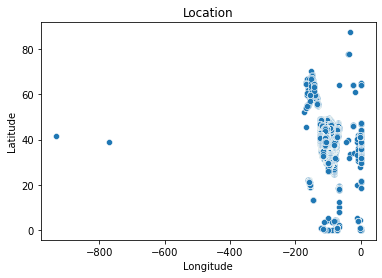

In [111]:
# plot coordinate values to visualize map
sns.scatterplot(x='longitude',y='latitude', data= merged_df )
plt.title('Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [112]:
#Select Latitude and longitude values to drop outside the US vicinity 
to_drop = merged_df.loc[(merged_df['longitude'] < -167) | (merged_df['longitude'] > -50) | (merged_df['latitude'] < 20)]
to_drop.head()

,state,str_id,deck_type,wearing_type,membrane_type,deck_protection,toll,avg_truck_traffic,freeze_thaw_cycle,snowfall_days,...,latitude,longitude,yr_reconst,skew,max_span,bridge_width,deck_width,super_st_condition,sub_st_condition,deck_condition
0,'1 - Alabama',080103000001007,'N','N','N','N','3',NaN,NaN,NaN,...,0.00000,0.000000,0.0,20.0,0.0,0.0,0.0,'N','N','N'
1,'1 - Alabama',080106000001009,'N','N','N','N','3',NaN,NaN,NaN,...,0.00000,0.000000,0.0,45.0,0.0,0.0,0.0,'N','N','N'
2,'1 - Alabama',020222,'N','N','N','N','3',14.0,6.0,8.0,...,31.10981,-9.024917,0.0,0.0,7.9,0.0,0.0,'N','N','N'
3,'1 - Alabama',021152,'1','0','0','0','3',20.0,NaN,NaN,...,33.52243,-33.522430,0.0,0.0,75.1,24.9,27.6,'9','9','9'
187,'1 - Alabama',DAPTRARUC025465,'2','0','0','0','3',1.0,16.0,1.0,...,31.37200,0.000000,0.0,0.0,34.1,14.4,16.4,'7','7','7'


In [113]:
merged_df.drop(to_drop.index, axis=0, inplace=True)

Text(0, 0.5, 'Latitude')

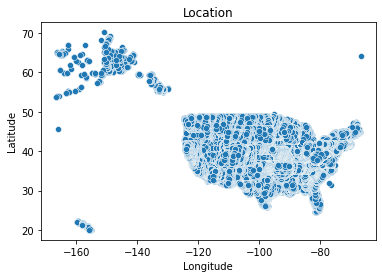

In [114]:
sns.scatterplot(x='longitude',y='latitude', data= merged_df )
plt.title('Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [115]:
to_drop = merged_df.loc[(merged_df['latitude'] < 55) & (merged_df['longitude'] < -163) |
                        (merged_df['latitude'] > 50) & (merged_df['longitude'] > -80) ]

In [116]:
merged_df.drop(to_drop.index, axis=0, inplace=True)

Text(0, 0.5, 'Latitude')

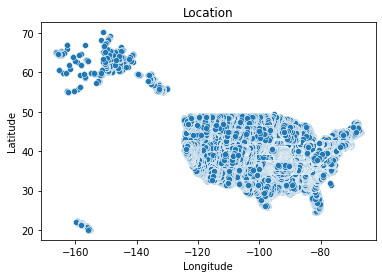

In [117]:
sns.scatterplot(x='longitude',y='latitude', data= merged_df )
plt.title('Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

### Removing unwanted characters from State

In [118]:
# iterate over columns to remove qoutes
merged_df = merged_df.applymap(lambda x: x.replace("'", '') if (isinstance(x, str)) else x)

In [119]:
#remove quotes from state
merged_df['state'] = merged_df['state'].map(lambda x: x.lstrip(''))

#remove numbers and characters from 'state'
merged_df['state'] = merged_df['state'].replace('[0123456789-]', '', regex=True)
merged_df['county'] = merged_df['county'].replace('[0123456789-]', '', regex=True)

In [120]:
merged_df.state

4               Alabama
5               Alabama
6               Alabama
7               Alabama
8               Alabama
              ...      
617122      Connecticut
617123      Connecticut
617124      Connecticut
617125      Connecticut
617126      Connecticut
Name: state, Length: 612944, dtype: object

In [121]:
merged_df.head()

,state,str_id,deck_type,wearing_type,membrane_type,deck_protection,toll,avg_truck_traffic,freeze_thaw_cycle,snowfall_days,...,latitude,longitude,yr_reconst,skew,max_span,bridge_width,deck_width,super_st_condition,sub_st_condition,deck_condition
4,Alabama,021480,1,0,0,0,3,35.0,14.0,0.0,...,31.12305,-85.05527,0.0,23.0,274.9,38.1,41.0,7,7,7
5,Alabama,009763,N,6,0,0,3,7.0,14.0,0.0,...,31.05112,-85.09267,0.0,45.0,12.1,0.0,0.0,N,N,N
6,Alabama,003324,N,N,N,N,3,7.0,14.0,0.0,...,31.17840,-85.11512,2009.0,0.0,7.9,0.0,0.0,N,N,N
7,Alabama,006369,1,0,0,0,3,7.0,14.0,0.0,...,31.18900,-85.11860,0.0,0.0,60.0,23.6,27.6,7,7,6
8,Alabama,015078,2,0,0,0,3,0.0,14.0,0.0,...,31.10713,-85.17017,0.0,0.0,15.1,23.6,24.9,5,6,5


### Removing irrelevant characters in Bridge condition

In [122]:
merged_df.bridge_condition.value_counts(normalize=True)

Fair    0.475733
Good    0.451783
Poor    0.072484
Name: bridge_condition, dtype: float64

In [123]:
# Get a list of the top 3 bridge_conditions
top3 = merged_df['bridge_condition'].value_counts()[:3].index

# At locations where the neighborhood is NOT in the top 3, 
# replace the brdige_condition with 'NA'
merged_df.loc[np.logical_not(merged_df['bridge_condition'].isin(top3)), 'bridge_condition'] = np.nan

In [124]:
merged_df.bridge_condition.value_counts()

Fair    283972
Good    269676
Poor     43267
Name: bridge_condition, dtype: int64

In [125]:
merged_df.bridge_condition.value_counts(normalize=True)

Fair    0.475733
Good    0.451783
Poor    0.072484
Name: bridge_condition, dtype: float64

### Dealing with missing values

We will be dropping the rows with missing locational data since they would be irrelevant if we can't locate them on the map.

In [126]:
merged_df.isna().sum()

state                              0
str_id                             0
deck_type                          0
wearing_type                       0
membrane_type                      0
deck_protection                    0
toll                               0
avg_truck_traffic              32238
freeze_thaw_cycle                 46
snowfall_days                     46
inventory_class_route              0
lanes_on_str                       0
lanes_under_str                    0
level_service_code                 0
yr_avg_traffic                    18
inventory_route_code               0
truck_network_code                 0
min_vertical_underclearance        0
min_lateral_underclearanceR        0
min_lateral_underclearanceL        0
county                         16029
avg_daily_trfc                 16045
design_material                16029
construction_design_value      16029
num_spans                      16029
structure_length               16029
bridge_condition               16029
b

In [127]:
# Drop rows which contain any NaN value in the selected columns
mod_df = merged_df.dropna( how='any',
                    subset=['latitude', 'longitude', 'bridge_condition'])

In [128]:
# fill 'avg_daily_trfc' missing values using random choice

s = mod_df.avg_daily_trfc.value_counts(normalize=True)
mod_df['avg_daily_trfic'] =mod_df['avg_daily_trfc']
mod_df.loc[mod_df.avg_daily_trfc.isna(),
           'avg_daily_trfic'] = np.random.choice(s.index, p=s.values, 
                                                 size=mod_df.avg_daily_trfc.isna().sum())

In [129]:
#drop the original 'avg_daily_trfc' column
mod_df.drop('avg_daily_trfc', axis=1, inplace=True)

In [130]:
# Replace missing values in yr_reconst by 0 assuming they have never been reconstructed
# Replace 'freeze_thaw_cycle', 'snowfall_days' missing values by 0 assuming they have no snowfall
cols = ['yr_reconst', 'freeze_thaw_cycle', 'snowfall_days']
for col in cols:
    mod_df[col].fillna(value=0, inplace=True)


In [131]:
mod_df.isna().sum()

state                              0
str_id                             0
deck_type                          0
wearing_type                       0
membrane_type                      0
deck_protection                    0
toll                               0
avg_truck_traffic              31144
freeze_thaw_cycle                  0
snowfall_days                      0
inventory_class_route              0
lanes_on_str                       0
lanes_under_str                    0
level_service_code                 0
yr_avg_traffic                    18
inventory_route_code               0
truck_network_code                 0
min_vertical_underclearance        0
min_lateral_underclearanceR        0
min_lateral_underclearanceL        0
county                             0
design_material                    0
construction_design_value          0
num_spans                          0
structure_length                   0
bridge_condition                   0
bridge_age                         0
l

Average truck traffic values missing acount for less than 6% of the data, but instead of lossing this data we will replace it by random choice.

In [132]:
# fill 'avg_daily_trfc' missing values using random choice
s = mod_df.avg_truck_traffic.value_counts(normalize=True)
mod_df['avg_truck_trfc'] =mod_df['avg_truck_traffic']
mod_df.loc[mod_df.avg_truck_trfc.isna(),
           'avg_truck_trfc'] = np.random.choice(s.index, p=s.values, size=mod_df.avg_truck_traffic.isna().sum())

In [133]:
#drop the original 'avg_truck_trfc' column
mod_df.drop('avg_truck_traffic', axis=1, inplace=True)

Referring to the National Bridge Inventory the Deck condition ranges from 0 to 9, with 0 signifying a failed structure and 9 being excellent condition of the structure, let's replace the character "N" with NAN and treat it as a missing value. 

In [134]:
cond_cols = ['deck_condition', 'sub_st_condition', 'super_st_condition']

for col in cond_cols:
    print(mod_df[col].value_counts())
    print('=======================')
    mod_df[col] = mod_df[col].replace({'N': np.nan}, regex=True)
    print(mod_df[col].value_counts())

7    191554
N    143438
6    113856
8     61947
5     55468
4     12190
9     10897
3      2150
0       785
2       399
1        72
Name: deck_condition, dtype: int64
7    191554
6    113856
8     61947
5     55468
4     12190
9     10897
3      2150
0       785
2       399
1        72
Name: deck_condition, dtype: int64
7    177119
N    138246
6    110455
8     71885
5     60488
4     16904
9     11362
3      4118
2      1150
0       778
1       251
Name: sub_st_condition, dtype: int64
7    177119
6    110455
8     71885
5     60488
4     16904
9     11362
3      4118
2      1150
0       778
1       251
Name: sub_st_condition, dtype: int64
7    171640
N    138080
6    108215
8     86399
5     56477
4     14119
9     13530
3      2740
0       779
2       591
1       186
Name: super_st_condition, dtype: int64
7    171640
6    108215
8     86399
5     56477
4     14119
9     13530
3      2740
0       779
2       591
1       186
Name: super_st_condition, dtype: int64


In [135]:
mod_df.isna().sum()

state                               0
str_id                              0
deck_type                           0
wearing_type                        0
membrane_type                       0
deck_protection                     0
toll                                0
freeze_thaw_cycle                   0
snowfall_days                       0
inventory_class_route               0
lanes_on_str                        0
lanes_under_str                     0
level_service_code                  0
yr_avg_traffic                     18
inventory_route_code                0
truck_network_code                  0
min_vertical_underclearance         0
min_lateral_underclearanceR         0
min_lateral_underclearanceL         0
county                              0
design_material                     0
construction_design_value           0
num_spans                           0
structure_length                    0
bridge_condition                    0
bridge_age                          0
latitude    

In [136]:
#change 'str' datatype of continuous variables to numeric values
to_numeric = ['avg_daily_trfic','yr_reconst','skew', 'max_span','num_spans',
              'structure_length','avg_truck_trfc', 'bridge_age','min_vertical_underclearance',
              'lanes_under_str','freeze_thaw_cycle','min_lateral_underclearanceR']

for col in to_numeric:
      mod_df[col] = pd.to_numeric(mod_df[col], errors='coerce') 

## Visualization

Text(0, 0.5, 'Number of Bridges')

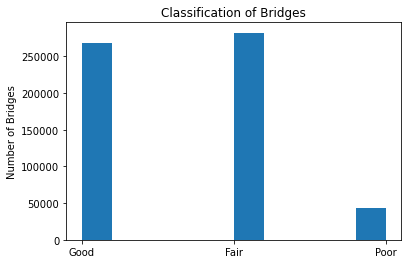

In [137]:
#plot number of wells according to functionality
plt.hist('bridge_condition', data=mod_df);
plt.title('Classification of Bridges')
plt.ylabel('Number of Bridges')

### Super structure condition

In [138]:
quantity_df = mod_df.groupby('super_st_condition')['bridge_condition'].value_counts().unstack()

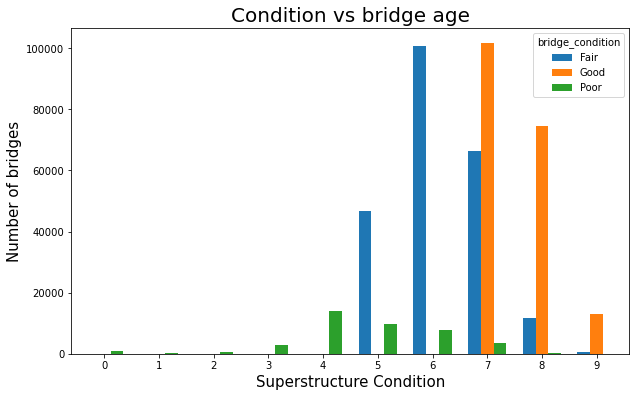

In [139]:
quantity_df.plot.bar(figsize = (10, 6), width=0.7)
plt.title('Condition vs bridge age', fontsize=20)
plt.xlabel('Superstructure Condition', fontsize=15)
plt.ylabel('Number of bridges', fontsize=15)
plt.xticks(rotation = 0);

In [140]:
# sns.pairplot(mod_df, hue='bridge_condition')

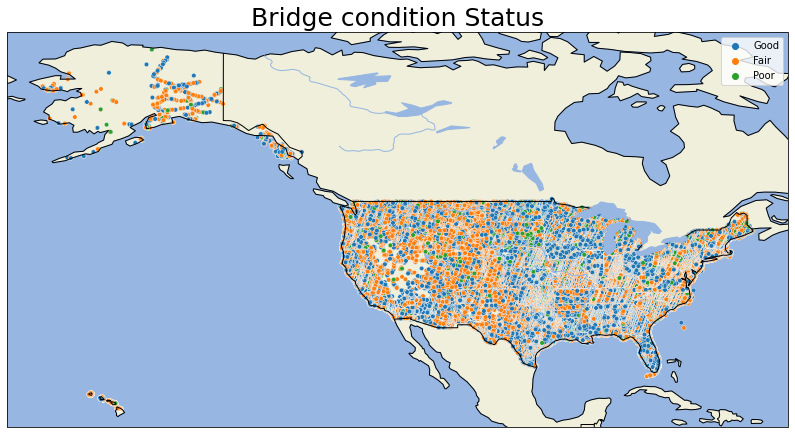

In [141]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


plt.figure(figsize=(14,10))

# Creates the map
ca_map = plt.axes(projection=ccrs.PlateCarree())

ca_map.add_feature(cfeature.LAND)
ca_map.add_feature(cfeature.OCEAN)
ca_map.add_feature(cfeature.COASTLINE)
ca_map.add_feature(cfeature.BORDERS, linestyle='-')
ca_map.add_feature(cfeature.LAKES)
ca_map.add_feature(cfeature.RIVERS)
# ca_map.add_feature(cfeature.STATES.with_scale('10m'))


# Plots the data onto map
sns.scatterplot(mod_df['longitude'], mod_df['latitude'], 
            s=20,
            hue=mod_df['bridge_condition'],
            transform=ccrs.PlateCarree())

# Plot labels
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title('Bridge condition Status', fontsize=25)
plt.legend()
plt.show()

In [142]:
mod_df.shape

(592756, 38)

In [143]:
mod_df1 = mod_df[:200000]
mod_df2 = mod_df[200000:400000]
mod_df3 = mod_df[400000:]

In [144]:
mod_df1.to_csv('bridge_data_cleaned1', index=False)
mod_df2.to_csv('bridge_data_cleaned2', index=False)
mod_df3.to_csv('bridge_data_cleaned3', index=False)

In the next step we will be taking a look at the modeling procedure for bridge condition classification. According to the NBI reports the three features (Super-structure, Sub-structure and Deck Condition) are dependent variables. Therefore, we will be dropping them since our target variable is 'bridge_condition.

In [145]:
mod_df.drop(columns=['super_st_condition', 'sub_st_condition', 'deck_condition'], axis=1, inplace=True)

In [146]:
#drop the nan values in 'bridge_condition'
mod_df.dropna(inplace=True)

# Creating Dummies

In [147]:
mod_df.columns

Index(['state', 'str_id', 'deck_type', 'wearing_type', 'membrane_type',
       'deck_protection', 'toll', 'freeze_thaw_cycle', 'snowfall_days',
       'inventory_class_route', 'lanes_on_str', 'lanes_under_str',
       'level_service_code', 'yr_avg_traffic', 'inventory_route_code',
       'truck_network_code', 'min_vertical_underclearance',
       'min_lateral_underclearanceR', 'min_lateral_underclearanceL', 'county',
       'design_material', 'construction_design_value', 'num_spans',
       'structure_length', 'bridge_condition', 'bridge_age', 'latitude',
       'longitude', 'yr_reconst', 'skew', 'max_span', 'bridge_width',
       'deck_width', 'avg_daily_trfic', 'avg_truck_trfc'],
      dtype='object')

In [148]:
#separate the features into target, categorical and continuous variables
target = ['bridge_condition']

categorical = ['deck_type', 'wearing_type', 'membrane_type', 'deck_protection',
               'toll', 'design_material',  'inventory_class_route', 'level_service_code', 'inventory_route_code',
               'truck_network_code',
               'construction_design_value']

continuous = ['freeze_thaw_cycle', 'snowfall_days', 'structure_length', 'bridge_age',
              'latitude', 'longitude', 'yr_reconst', 'skew', 'yr_avg_traffic',
              'max_span', 'bridge_width', 'deck_width', 'avg_daily_trfic', 'num_spans',
              'avg_truck_trfc', 'min_vertical_underclearance','lanes_on_str', 
               'lanes_under_str',
               'min_lateral_underclearanceR', 'min_lateral_underclearanceL']

to_drop = ['state', 'str_id', 'county']

In [149]:
# print number of classes in each category
for col in categorical:
    print(col, mod_df[col].value_counts().count())

deck_type 10
wearing_type 11
membrane_type 7
deck_protection 10
toll 5
design_material 9
inventory_class_route 12
level_service_code 8
inventory_route_code 2
truck_network_code 2
construction_design_value 22


In [150]:
# select only the categorical variables
mod_df.drop(to_drop+target+continuous, axis=1).columns

Index(['deck_type', 'wearing_type', 'membrane_type', 'deck_protection', 'toll',
       'inventory_class_route', 'level_service_code', 'inventory_route_code',
       'truck_network_code', 'design_material', 'construction_design_value'],
      dtype='object')

In [151]:
# Use one-hot-encoding on categorical variables
df_dummies = pd.get_dummies(mod_df.drop(to_drop+target, axis=1))
df_dummies.head()

,freeze_thaw_cycle,snowfall_days,lanes_on_str,lanes_under_str,yr_avg_traffic,min_vertical_underclearance,min_lateral_underclearanceR,min_lateral_underclearanceL,num_spans,structure_length,...,construction_design_value_Orthotropic,construction_design_value_Other Main Design /Construction OR No Approach or Second Span Type,construction_design_value_Segmental Box Girder,construction_design_value_Slab,construction_design_value_Stayed Girder,construction_design_value_Stringer/Multi-beam or Girder,construction_design_value_Suspension,construction_design_value_Tee Beam,construction_design_value_Truss - Deck,construction_design_value_Truss - Thru
4,14.0,0.0,2,0,2012.0,0.0,0.0,0.0,3.0,955.1,...,0,0,0,0,0,1,0,0,0,0
5,14.0,0.0,2,0,1990.0,0.0,0.0,0.0,3.0,52.5,...,0,0,0,0,0,0,0,0,0,0
6,14.0,0.0,2,0,2011.0,0.0,0.0,0.0,3.0,25.3,...,0,0,0,0,0,0,0,0,0,0
7,14.0,0.0,2,0,2011.0,0.0,0.0,0.0,3.0,399.0,...,0,0,0,0,0,0,0,1,0,0
8,14.0,0.0,2,0,1992.0,0.0,0.0,0.0,3.0,44.9,...,0,0,0,0,0,0,0,0,0,0


In [152]:
df_dummies.shape

(592738, 118)

In [153]:
df_dummies['bridge_condition'] = mod_df['bridge_condition']

In [154]:
df_dummies.head()

,freeze_thaw_cycle,snowfall_days,lanes_on_str,lanes_under_str,yr_avg_traffic,min_vertical_underclearance,min_lateral_underclearanceR,min_lateral_underclearanceL,num_spans,structure_length,...,construction_design_value_Other Main Design /Construction OR No Approach or Second Span Type,construction_design_value_Segmental Box Girder,construction_design_value_Slab,construction_design_value_Stayed Girder,construction_design_value_Stringer/Multi-beam or Girder,construction_design_value_Suspension,construction_design_value_Tee Beam,construction_design_value_Truss - Deck,construction_design_value_Truss - Thru,bridge_condition
4,14.0,0.0,2,0,2012.0,0.0,0.0,0.0,3.0,955.1,...,0,0,0,0,1,0,0,0,0,Good
5,14.0,0.0,2,0,1990.0,0.0,0.0,0.0,3.0,52.5,...,0,0,0,0,0,0,0,0,0,Fair
6,14.0,0.0,2,0,2011.0,0.0,0.0,0.0,3.0,25.3,...,0,0,0,0,0,0,0,0,0,Good
7,14.0,0.0,2,0,2011.0,0.0,0.0,0.0,3.0,399.0,...,0,0,0,0,0,0,1,0,0,Fair
8,14.0,0.0,2,0,1992.0,0.0,0.0,0.0,3.0,44.9,...,0,0,0,0,0,0,0,0,0,Fair


In [155]:
df_dummies.bridge_condition.value_counts(normalize=True)

Fair    0.476145
Good    0.451491
Poor    0.072364
Name: bridge_condition, dtype: float64

In [156]:
# Replace target values - there are three classes
# df_dummies = df_dummies.replace({'bridge_condition': {'Poor' : 0, 
#                                 'Fair' : 1, 
#                                 'Good' : 2}})

# Modeling

In [157]:
# assign variables for features and target 
X = df_dummies.drop('bridge_condition', axis = 1)
y = df_dummies['bridge_condition']

In [158]:
# split into test and train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    stratify=df_dummies['bridge_condition'], random_state = 42)

# KNN

In [160]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

models = []
def get_metrics(y_test, X_test, model):
    labels = y_test.to_numpy()
    preds = model.predict(X_test)
    
    metrics = {}
    metrics['accuracy'] = accuracy_score(labels, preds)
    metrics['f1'] = f1_score(labels, preds, average='macro')
    metrics['precision'] = precision_score(labels, preds, average='macro')
    metrics['recall'] = recall_score(labels, preds, average='macro')
    
    return metrics

## Baseline model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train);

metrics = get_metrics(y_test, X_test, knn)
metrics['name'] = 'K Nearest Neighbors Baseline'
models.append(metrics)

In [ ]:
print(classification_report(y_train, knn.predict(X_train)))

In [ ]:
print(classification_report(y_test, knn.predict(X_test)))

## Confusion matrix

In [ ]:
plt.figure(figsize=(6,5))
plot_confusion_matrix(knn, X_test, y_test, values_format='d', cmap=plt.cm.Blues)
plt.title('K Nearest Neighbors')
plt.tight_layout()

plt.show()

## Standardization

First scale the data. We scale the data after splitting the train and test data to avoid data leakage.

In [175]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler 


# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X.columns)
scaled_df_train.head()

,freeze_thaw_cycle,snowfall_days,lanes_on_str,lanes_under_str,yr_avg_traffic,min_vertical_underclearance,min_lateral_underclearanceR,min_lateral_underclearanceL,num_spans,structure_length,...,construction_design_value_Orthotropic,construction_design_value_Other Main Design /Construction OR No Approach or Second Span Type,construction_design_value_Segmental Box Girder,construction_design_value_Slab,construction_design_value_Stayed Girder,construction_design_value_Stringer/Multi-beam or Girder,construction_design_value_Suspension,construction_design_value_Tee Beam,construction_design_value_Truss - Deck,construction_design_value_Truss - Thru
0,-1.080208,-0.882637,-0.239328,-0.317957,0.082843,-0.366578,2.334734,-0.201127,0.291625,-0.227231,...,-0.027625,-0.061554,-0.024004,-0.394749,-0.009123,-0.802160,-0.010919,-0.249486,-0.023144,-0.11253
1,-0.874480,-1.021765,-1.061838,-0.317957,-0.072013,-0.366578,-0.489493,-0.201127,-0.385266,-0.260052,...,-0.027625,-0.061554,-0.024004,-0.394749,-0.009123,1.246633,-0.010919,-0.249486,-0.023144,-0.11253
2,1.091363,1.204270,0.583182,3.261670,0.103042,1.552256,-0.192653,0.533380,0.291625,0.477603,...,-0.027625,-0.061554,-0.024004,-0.394749,-0.009123,1.246633,-0.010919,-0.249486,-0.023144,-0.11253
3,1.982850,0.842539,-0.239328,-0.317957,0.103042,-0.366578,-0.489493,-0.201127,-0.159636,-0.195108,...,-0.027625,-0.061554,-0.024004,-0.394749,-0.009123,1.246633,-0.010919,-0.249486,-0.023144,-0.11253
4,-0.714469,-0.799161,-0.239328,-0.317957,0.096309,-0.366578,-0.489493,-0.201127,0.742886,0.072114,...,-0.027625,-0.061554,-0.024004,-0.394749,-0.009123,-0.802160,-0.010919,4.008245,-0.023144,-0.11253


Now that you've preprocessed the data it's time to train a KNN classifier and validate its accuracy.

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
knn = KNeighborsClassifier()
# Fit the classifier
knn.fit(scaled_data_train, y_train);


# Predict on the test set

metrics = get_metrics(y_test, scaled_data_test, knn)
metrics['name'] = 'K Nearest Neighbors scaled'
models.append(metrics)

In [ ]:
# 

## Grid search CV

In [170]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_neighbors': [1, 5, 9], # default 5
    'weights': ['uniform', 'distance'], # default 'uniform'
    'leaf_size': [30, 40], # default 30
    'p': [1, 2] # default 2
}



grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
knn_tuned = KNeighborsClassifier(n_neighbors=9, weights='distance', leaf_size=30, p=1)
knn_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, knn_tuned)
metrics['name'] = 'K Nearest Neighbors tuned'
models.append(metrics)

## Confusion Matrix

In [ ]:
plt.figure(figsize=(6,5))
plot_confusion_matrix(knn_tuned, scaled_data_test, y_test, values_format='d', cmap=plt.cm.Blues)
plt.title('K Nearest Neighbors')
plt.tight_layout()

plt.show()

In [ ]:
print(classification_report(y_train, knn_tuned.predict(scaled_data_train)))

In [ ]:
print(classification_report(y_test, knn_tuned.predict(scaled_data_test)))

## Smote

In [184]:
from imblearn.over_sampling import SMOTE

In [185]:
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

Fair    282229
Good    267616
Poor     42893
Name: bridge_condition, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

Fair    211671
Poor    211671
Good    211671
Name: bridge_condition, dtype: int64


In [ ]:
knn_smote = KNeighborsClassifier(n_neighbors=9, weights='distance', 
                                 leaf_size=30, p=1)
knn_smote.fit(X_train_resampled, y_train_resampled)
get_metrics(y_test, X_test, knn_smote)
metrics['name'] = 'K Nearest Neighbors smote'
models.append(metrics)

In [ ]:
print(classification_report(y_train_resampled, knn_smote.predict(X_train_resampled)))

In [ ]:
print(classification_report(y_test, knn_smote.predict(X_test)))

## Confusion matrix

In [ ]:
plot_confusion_matrix(knn_smote, X_test, y_test,
                      values_format='d', cmap=plt.cm.Blues)
                                      
                     
plt.title('K Nearest Neighbors smote')
plt.tight_layout()

plt.show()

# Random Forest

## Baseline model

In [161]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=12)
forest.fit(X_train, y_train);

metrics = get_metrics(y_test, X_test, forest)
metrics['name'] = 'Random Forest Baseline'
models.append(metrics)

In [162]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,forest.predict(X_test))

array([[56147, 13207,  1204],
       [14070, 52769,    65],
       [ 7798,   477,  2448]], dtype=int64)

In [163]:
print(classification_report(y_train, forest.predict(X_train)))

              precision    recall  f1-score   support

        Fair       1.00      1.00      1.00    211671
        Good       1.00      1.00      1.00    200712
        Poor       1.00      1.00      1.00     32170

    accuracy                           1.00    444553
   macro avg       1.00      1.00      1.00    444553
weighted avg       1.00      1.00      1.00    444553



In [164]:
print(classification_report(y_test, forest.predict(X_test)))

              precision    recall  f1-score   support

        Fair       0.72      0.80      0.76     70558
        Good       0.79      0.79      0.79     66904
        Poor       0.66      0.23      0.34     10723

    accuracy                           0.75    148185
   macro avg       0.72      0.60      0.63    148185
weighted avg       0.75      0.75      0.74    148185



## Confusion Matrix

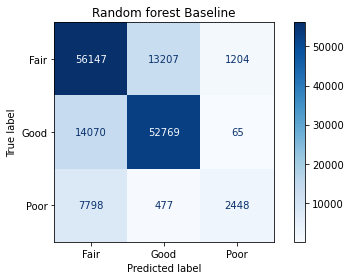

In [165]:
plot_confusion_matrix(forest, X_test, y_test,
                      values_format='d', cmap=plt.cm.Blues)

plt.title('Random forest Baseline')
plt.tight_layout()

plt.show()

## Grid search

In [ ]:
param_grid = {
    'n_estimators': [100, 200], # default 100 #boosting stages
    'max_depth': [30, 35, 40], # default None
    'max_features': ['auto',50, 60], # default 'auto': auto=sqrt(# of features)=11
#     'min_samples_split' : 70,
#     'min_samples_leaf'  : 35
}
forest = RandomForestClassifier()
grid_search = GridSearchCV(forest, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [166]:
forest_tuned = RandomForestClassifier(n_estimators=200, max_depth=40,
                                      max_features=60, min_samples_leaf=35, 
                                      min_samples_split=70)
forest_tuned.fit(X_train, y_train)
get_metrics(y_test, X_test, forest_tuned)
metrics['name'] = 'Random Forest tuned'
models.append(metrics)

In [167]:
print(classification_report(y_train, forest_tuned.predict(X_train)))

              precision    recall  f1-score   support

        Fair       0.73      0.82      0.77    211671
        Good       0.81      0.80      0.81    200712
        Poor       0.78      0.19      0.31     32170

    accuracy                           0.77    444553
   macro avg       0.77      0.60      0.63    444553
weighted avg       0.77      0.77      0.75    444553



In [168]:
print(classification_report(y_test, forest_tuned.predict(X_test)))

              precision    recall  f1-score   support

        Fair       0.70      0.79      0.74     70558
        Good       0.78      0.77      0.78     66904
        Poor       0.69      0.16      0.27     10723

    accuracy                           0.74    148185
   macro avg       0.72      0.58      0.59    148185
weighted avg       0.74      0.74      0.72    148185



In [172]:
param_grid = {
    'n_estimators': [150, 200], # default 100
    'max_depth': [35, 40, 50], # default None
    'max_features': [55, 60, 65],
#     'min_samples_split' : 70,
#     'min_samples_leaf'  : 35 
# we assume 5 would be the min sample leaf and avoid further search    
}
forest = RandomForestClassifier()
grid_search = GridSearchCV(forest, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [173]:
grid_search.best_params_

{'max_depth': 40, 'max_features': 60, 'n_estimators': 200}

In [176]:
forest_tuned = RandomForestClassifier(n_estimators=200, max_depth=40,
                                      max_features=60, min_samples_leaf=35, 
                                      min_samples_split=70)
forest_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, forest_tuned)
metrics['name'] = 'Random Forest tuned'
models.append(metrics)

In [177]:
print(classification_report(y_train, forest_tuned.predict(scaled_data_train)))

              precision    recall  f1-score   support

        Fair       0.73      0.82      0.77    211671
        Good       0.81      0.80      0.81    200712
        Poor       0.77      0.19      0.30     32170

    accuracy                           0.77    444553
   macro avg       0.77      0.60      0.63    444553
weighted avg       0.77      0.77      0.75    444553



In [178]:
print(classification_report(y_test, forest_tuned.predict(scaled_data_test)))

              precision    recall  f1-score   support

        Fair       0.70      0.79      0.74     70558
        Good       0.78      0.77      0.78     66904
        Poor       0.69      0.16      0.26     10723

    accuracy                           0.74    148185
   macro avg       0.72      0.57      0.59    148185
weighted avg       0.74      0.74      0.72    148185



## Smote

In [186]:
forest_smote = RandomForestClassifier(n_estimators=200, max_depth=40,
                                      max_features=60, min_samples_leaf=35, 
                                      min_samples_split=70)
forest_smote.fit(X_train_resampled, y_train_resampled)
get_metrics(y_test, X_test, forest_smote)
metrics['name'] = 'Random Forest smote'
models.append(metrics)

In [187]:
print(classification_report(y_train, forest_smote.predict(X_train_resampled)))

              precision    recall  f1-score   support

        Fair       0.75      0.79      0.77    211671
        Good       0.81      0.80      0.80    200712
        Poor       0.60      0.43      0.50     32170

    accuracy                           0.77    444553
   macro avg       0.72      0.67      0.69    444553
weighted avg       0.76      0.77      0.76    444553



In [188]:
print(classification_report(y_test, forest_smote.predict(X_test)))

              precision    recall  f1-score   support

        Fair       0.71      0.75      0.73     70558
        Good       0.78      0.77      0.77     66904
        Poor       0.49      0.36      0.41     10723

    accuracy                           0.73    148185
   macro avg       0.66      0.63      0.64    148185
weighted avg       0.73      0.73      0.73    148185



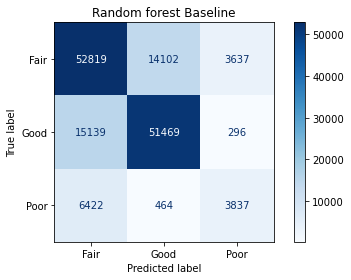

In [189]:
plot_confusion_matrix(forest_smote, X_test, y_test,
                      values_format='d', cmap=plt.cm.Blues)

plt.title('Random forest Baseline')
plt.tight_layout()

plt.show()

## Feature importance

Text(0, 0.5, 'Features')

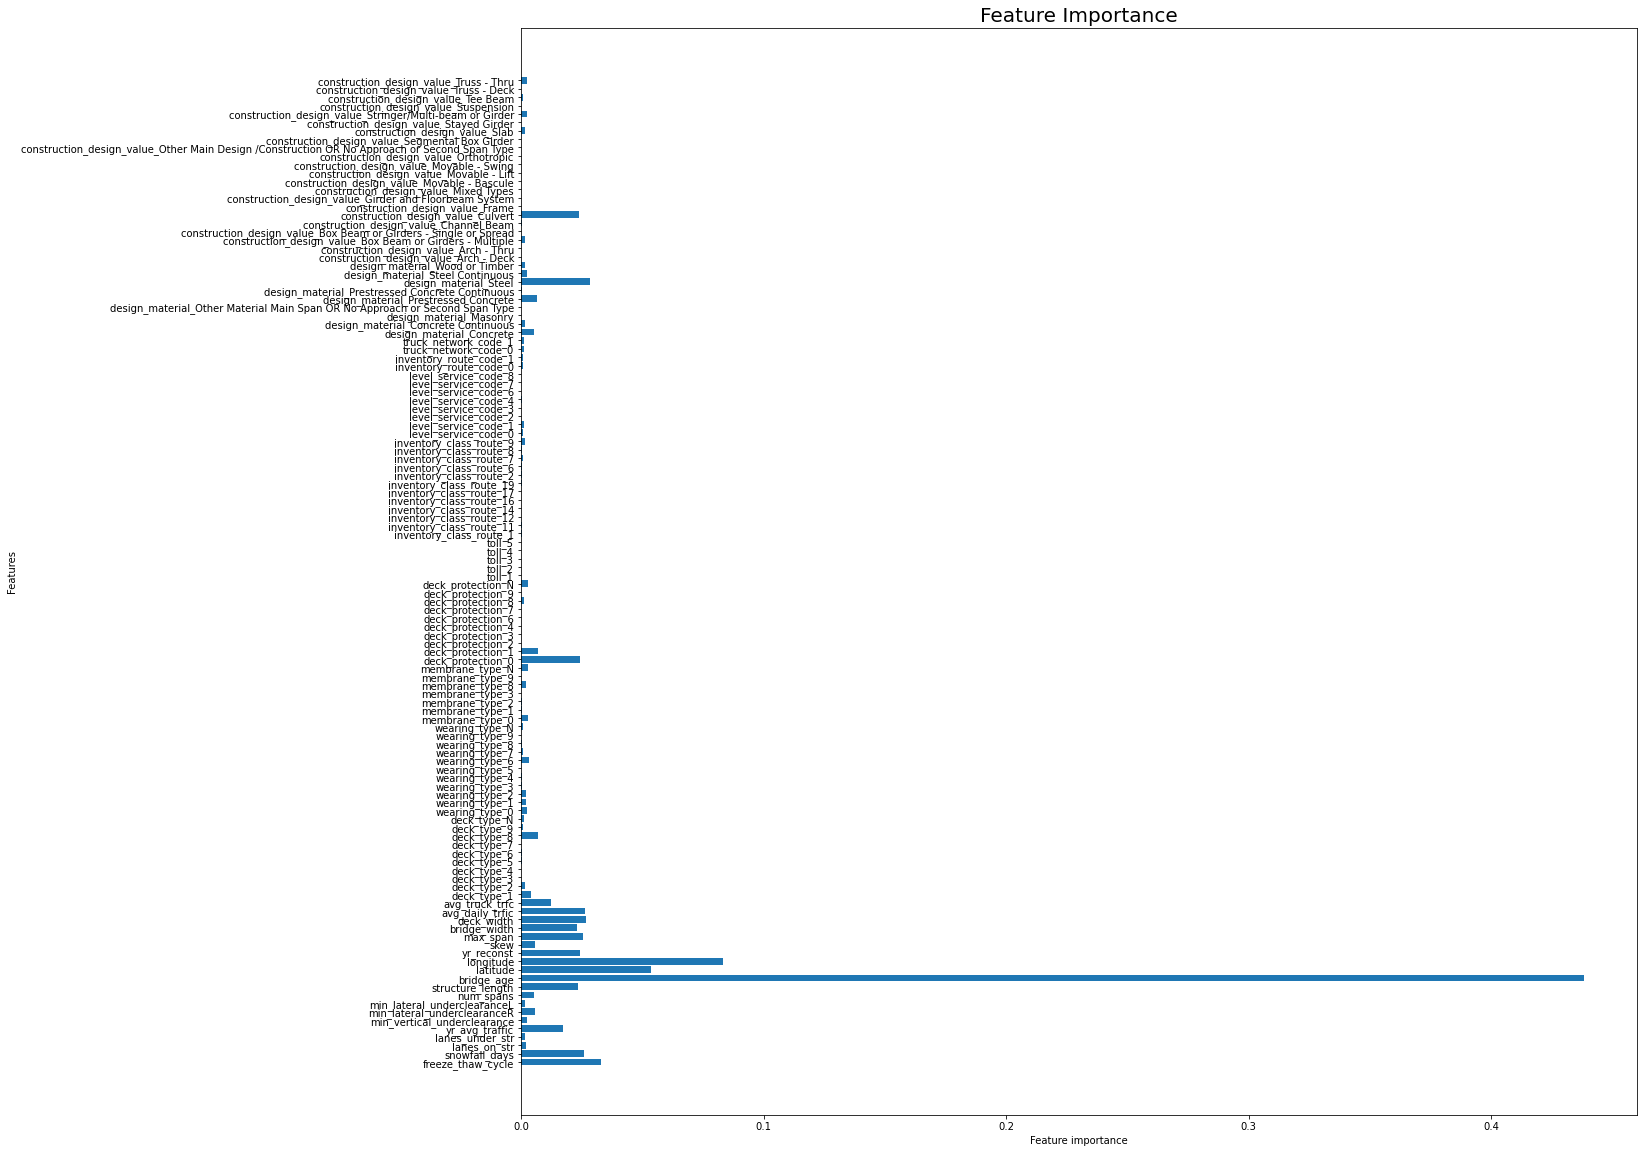

In [190]:
# Plot the feature importance of each feature
features = X_train.shape[1]
plt.figure(figsize=(20,20))
plt.barh(range(features), forest_tuned.feature_importances_, align='center')
plt.yticks(np.arange(features), X_train.columns.values)
plt.title('Feature Importance', fontsize=20)
plt.xlabel('Feature importance')
plt.ylabel('Features')

# XGBoost

## Baseline model

In [191]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate XGBClassifier and fit classifier
xgb = XGBClassifier(random_state=12)
xgb.fit(X_train, y_train);

metrics = get_metrics(y_test, X_test, xgb)
# metrics['name'] = 'XG Boost Baseline'
# models.append(metrics)

C:\Users\milen\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:20:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [194]:
print(classification_report(y_train, xgb.predict(X_train)))

              precision    recall  f1-score   support

        Fair       0.71      0.80      0.75    211671
        Good       0.79      0.78      0.79    200712
        Poor       0.70      0.22      0.33     32170

    accuracy                           0.75    444553
   macro avg       0.73      0.60      0.62    444553
weighted avg       0.75      0.75      0.74    444553



In [195]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

        Fair       0.70      0.78      0.74     70558
        Good       0.78      0.76      0.77     66904
        Poor       0.64      0.20      0.31     10723

    accuracy                           0.73    148185
   macro avg       0.71      0.58      0.61    148185
weighted avg       0.73      0.73      0.72    148185



## Confusion matrix

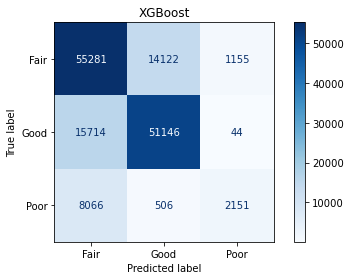

In [196]:
plot_confusion_matrix(xgb, X_test, y_test, 
                     values_format='d', 
                      cmap=plt.cm.Blues)
plt.title('XGBoost')
plt.tight_layout()

plt.show()

## Standardization

In [ ]:
# Fit the classifier
xgb.fit(scaled_data_train, y_train);

# Predict on the test set
metrics = get_metrics(y_test, scaled_data_test, xgb)
metrics['name'] = 'XGBoost_scaled'
models.append(metrics)

## Grid search

In [ ]:
param_grid = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [6, 8, 10],
    'subsample': [0.5, 0.7],
    'n_estimators': [100, 150, 200],
}
xgb = XGBClassifier()
grid_search = GridSearchCV(xgb, param_grid, cv=None, scoring='f1_macro', n_jobs=1)
grid_search.fit(scaled_data_train, y_train, eval_metric="error")

C:\Users\milen\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [ ]:
grid_search.best_params_

In [ ]:
xgb_tuned

In [ ]:
# Instantiate XGBClassifier and fit classifier

xgb_tuned = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=10,
                          subsample=0.5,use_label_encoder =False)
eval_set = [(X_test, y_test)]
xgb_tuned.fit(scaled_data_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)
get_metrics(y_test, scaled_data_test, xgb_tuned)
metrics['name'] = 'XGBoost_tuned1'
models.append(metrics)

In [ ]:
print(classification_report(y_train, xgb_tuned.predict(scaled_data_train)))

In [ ]:
print(classification_report(y_test, xgb_tuned.predict(scaled_data_test)))

## Confusion matrix

In [ ]:
plot_confusion_matrix(xgb_tuned, scaled_data_test, y_test, values_format='d',
                      cmap=plt.cm.Blues)
plt.title('XGBoost tuned')
plt.tight_layout()

plt.show()

## Smote

In [ ]:
# Instantiate XGBClassifier and fit classifier
xgb_smote = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=10,
                          subsample=0.5)
xgb_smote.fit(X_train_resampled, y_train_resampled)
get_metrics(y_test, scaled_data_test, xgb_smote)
metrics['name'] = 'XGBoost_smote'
models.append(metrics)

In [ ]:
print(classification_report(y_test, xgb_smote.predict(scaled_data_test)))

## Confusion matrix

In [ ]:
plot_confusion_matrix(xgb_smote, scaled_data_test, y_test, values_format='d',
                      cmap=plt.cm.Blues)
plt.title('XGBoost smote')
plt.tight_layout()

plt.show()